In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('integrated Asma Data_basedOnAdmission.csv')
df

,num_sequencial,sexo,idade,dicofre,distrito,concelho,freguesia,regiao,nacionalidade,data_admissao,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,372731,1,35,111009,LISBOA,OEIRAS,PORTO SALVO,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,10.3,5,NaN,2019-01-01T07:54:47,2019-01-01T17:25:27,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."
1,945004,1,11,111012,LISBOA,OEIRAS,ALGÉS,LISBOA E VALE DO TEJO,BRASIL,2019-01-01,...,10.3,5,NaN,2019-01-01T07:54:47,2019-01-01T17:25:27,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."
2,1156492,1,5,111012,LISBOA,OEIRAS,ALGÉS,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,10.3,5,NaN,2019-01-01T07:54:47,2019-01-01T17:25:27,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."
3,1156493,2,45,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,10.3,5,NaN,2019-01-01T07:54:47,2019-01-01T17:25:27,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."
4,114619,1,26,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,10.3,5,NaN,2019-01-01T07:54:47,2019-01-01T17:25:27,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,354903,2,71,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2020-03-03,...,12.0,7,NaN,2020-03-03T07:05:26,2020-03-03T18:31:59,0.28,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"08535099999,08532099999,08534099999,D7126,0853..."
1096,527675,2,20,111004,LISBOA,OEIRAS,OEIRAS E S JULIAO DA BARRA,LISBOA E VALE DO TEJO,PORTUGAL,2020-03-03,...,12.0,7,NaN,2020-03-03T07:05:26,2020-03-03T18:31:59,0.28,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"08535099999,08532099999,08534099999,D7126,0853..."
1097,559591,1,12,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2019-05-02,...,26.4,9,NaN,2019-05-02T06:38:24,2019-05-02T20:29:27,0.97,Clear,Clear conditions throughout the day.,clear-day,"08535099999,F1372,08532099999,08534099999,0853..."
1098,1073017,2,82,111014,LISBOA,OEIRAS,OEIRAS E S.JULIÃO DA BARRA,LISBOA E VALE DO TEJO,PORTUGAL,2020-01-11,...,10.5,5,NaN,2020-01-11T07:54:35,2020-01-11T17:34:19,0.51,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT..."


In [16]:
df.columns

Index(['num_sequencial', 'sexo', 'idade', 'dicofre', 'distrito', 'concelho',
       'freguesia', 'regiao', 'nacionalidade', 'data_admissao', 'colorid',
       'cor', 'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa',
       'cod_destino', 'destino', 'diagnostico', 'classe', 'asma', 'date',
       'pollen_intensity', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [17]:
df['datetime'].value_counts()

2019-05-14    9
2019-11-25    9
2019-05-15    9
2020-01-27    8
2020-02-17    8
             ..
2019-09-15    1
2019-09-22    1
2019-10-01    1
2019-10-02    1
2020-01-22    1
Name: datetime, Length: 395, dtype: int64

In [18]:
# make sure the date column is converted to a datetime dtype
df['datetime'] = pd.to_datetime(df['datetime'])

# extract only the date component of the date column
df.datetime = df.datetime.dt.date

In [19]:
df.pivot_table(index='asma', columns='datetime', aggfunc='count')


causa                                                         \
datetime 2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06   
asma                                                                         
1                 5          3          1          5          2          3   

                                                      ...  windspeed  \
datetime 2019-01-07 2019-01-08 2019-01-09 2019-01-10  ... 2020-03-13   
asma                                                  ...              
1                 4          3          2          2  ...          4   

                                                                            \
datetime 2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-19 2020-03-20   
asma                                                                         
1                 1          5          2          2          1          1   

                                           
datetime 2020-03-26 2020-03-28 2020-03-30  
asma                                       
1                 1          1          1  

[1 rows x 21330 columns]

In [32]:
df.groupby(['num_sequencial']).size().value_counts()

1     720
2     106
3      28
4       5
5       3
7       2
15      1
9       1
11      1
dtype: int64

In [33]:
df.groupby(['datetime']).size().value_counts()

2    102
1    101
3     81
4     52
5     30
6     18
7      5
9      3
8      3
dtype: int64

<AxesSubplot: ylabel='datetime'>

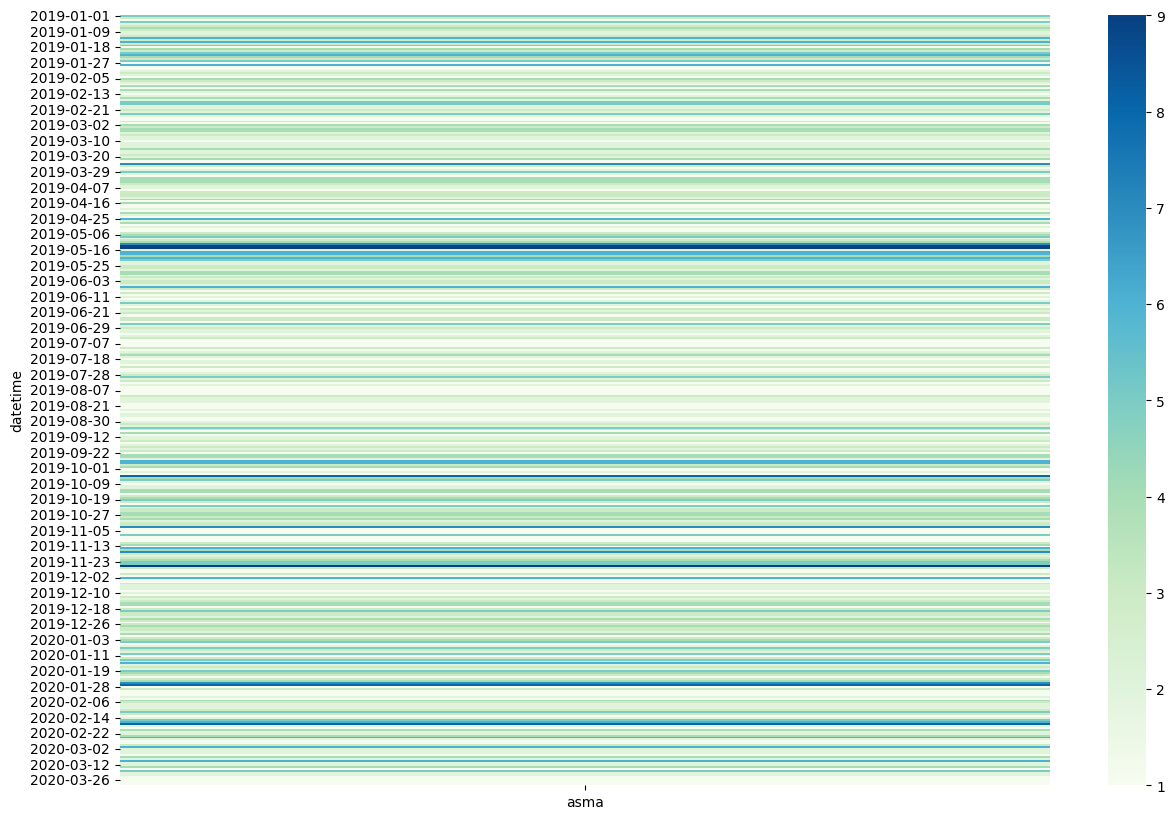

In [20]:
# reshape the data for heatmap; if there's no need to aggregate a function, then use .pivot(...)
dfp = df.pivot_table(index='datetime', values='asma', aggfunc='count')
dfp
# # display(dfp.head())
# date   2016-08-09  2016-08-11  2016-08-13  2016-08-15  2016-08-17  2016-08-19  2016-08-21  2016-08-23  2016-08-25  2016-09-09
# depth                                                                                                                        
# 1.50     0.334661         NaN         NaN    0.302670    0.314186    0.325257    0.313645    0.263135         NaN         NaN
# 1.75     0.305488    0.303005    0.410124    0.299095    0.313899    0.280732    0.275758    0.260641         NaN    0.318099
# 2.00     0.322312    0.274105         NaN    0.319606    0.268984    0.368449    0.311517    0.309923         NaN    0.306162
# 2.25     0.289959    0.315081         NaN    0.302202    0.306286    0.339809    0.292546    0.314225    0.263875         NaN
# 2.50     0.314227    0.296968         NaN    0.312705    0.333797    0.299556    0.327187    0.326958         NaN         NaN

# plot
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dfp, cmap='GnBu')

In [21]:
df.drop(['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase'],
        axis=1, inplace=True)

In [29]:
df

,num_sequencial,sexo,idade,colorid,pollen_intensity,datetime,tempmax,tempmin,temp,feelslikemax,...,precipcover,windgust,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,372731,1,35,3.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,0.00,NaN,11.1,1031.6,1.2,10.1,117.2,10.3,5,Clear
1,945004,1,11,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,0.00,NaN,11.1,1031.6,1.2,10.1,117.2,10.3,5,Clear
2,1156492,1,5,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,0.00,NaN,11.1,1031.6,1.2,10.1,117.2,10.3,5,Clear
3,1156493,2,45,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,0.00,NaN,11.1,1031.6,1.2,10.1,117.2,10.3,5,Clear
4,114619,1,26,4.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,0.00,NaN,11.1,1031.6,1.2,10.1,117.2,10.3,5,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,354903,2,71,3.0,good,2020-03-03,19.5,11.2,15.2,19.5,...,12.50,38.9,22.3,1023.6,63.8,10.8,140.7,12.0,7,"Rain, Partially cloudy"
1096,527675,2,20,3.0,good,2020-03-03,19.5,11.2,15.2,19.5,...,12.50,38.9,22.3,1023.6,63.8,10.8,140.7,12.0,7,"Rain, Partially cloudy"
1097,559591,1,12,2.0,elevados,2019-05-02,27.6,13.9,20.2,27.5,...,0.00,NaN,22.7,1010.4,1.4,11.5,306.1,26.4,9,Clear
1098,1073017,2,82,3.0,good,2020-01-11,14.0,7.8,10.7,14.0,...,0.00,NaN,15.7,1031.5,2.1,10.8,121.9,10.5,5,Clear


<AxesSubplot: >

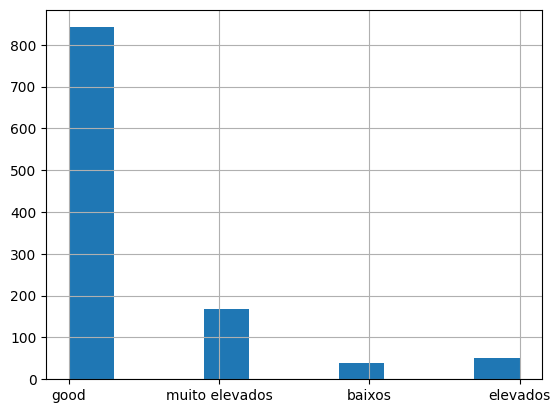

In [6]:
df['pollen_intensity'].hist()

<AxesSubplot: >

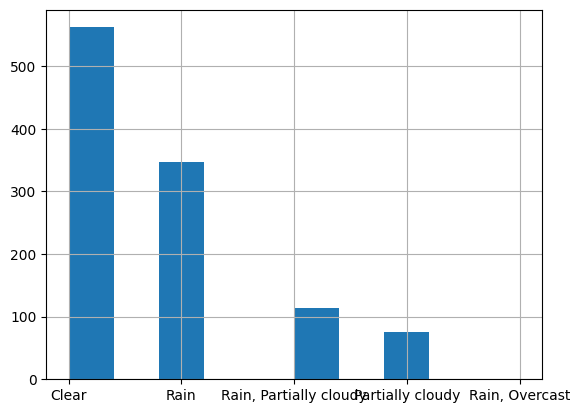

In [7]:
df['conditions'].hist()

array([[<AxesSubplot: title={'center': 'humidity'}>]], dtype=object)

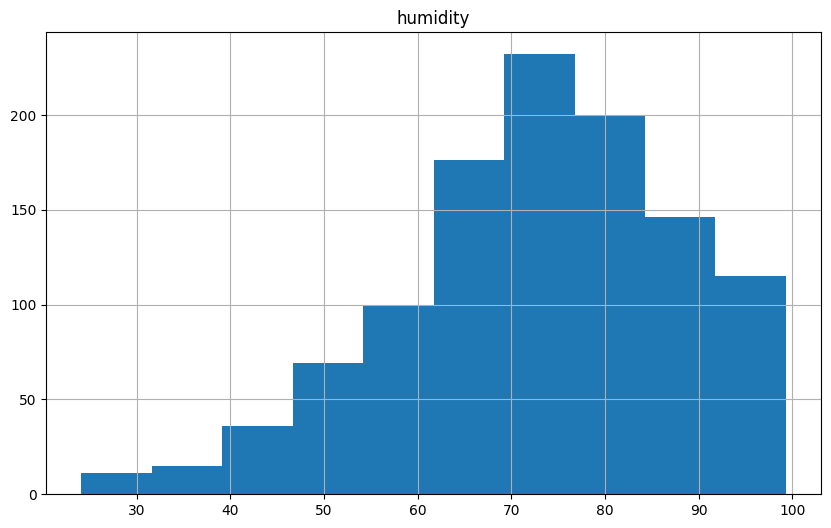

In [8]:
df[['humidity']].hist(figsize=(10,6))

array([[<AxesSubplot: title={'center': 'baixos'}>,
        <AxesSubplot: title={'center': 'elevados'}>],
       [<AxesSubplot: title={'center': 'good'}>,
        <AxesSubplot: title={'center': 'muito elevados'}>]], dtype=object)

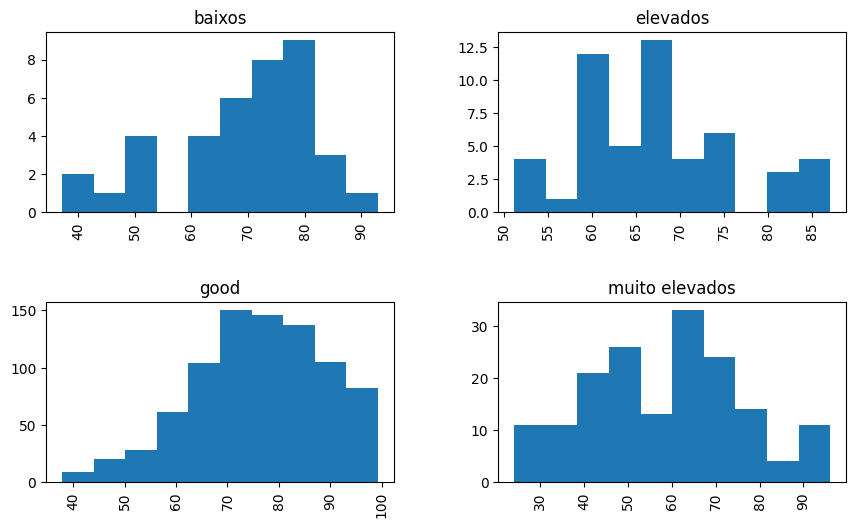

In [9]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

array([[<AxesSubplot: title={'center': 'Clear'}>,
        <AxesSubplot: title={'center': 'Partially cloudy'}>],
       [<AxesSubplot: title={'center': 'Rain'}>,
        <AxesSubplot: title={'center': 'Rain, Overcast'}>],
       [<AxesSubplot: title={'center': 'Rain, Partially cloudy'}>,
        <AxesSubplot: >]], dtype=object)

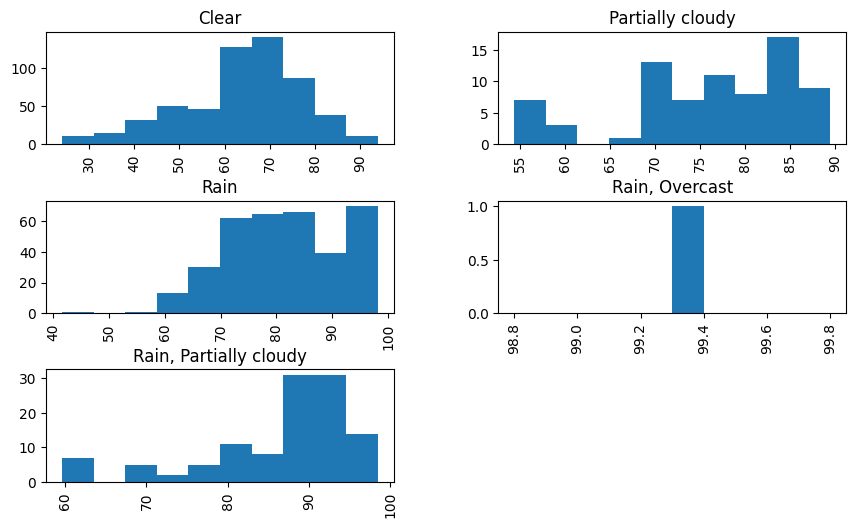

In [10]:
df[['conditions', 'humidity']].hist(figsize=(10,6), by='conditions')

array([[<AxesSubplot: title={'center': 'baixos'}>,
        <AxesSubplot: title={'center': 'elevados'}>],
       [<AxesSubplot: title={'center': 'good'}>,
        <AxesSubplot: title={'center': 'muito elevados'}>]], dtype=object)

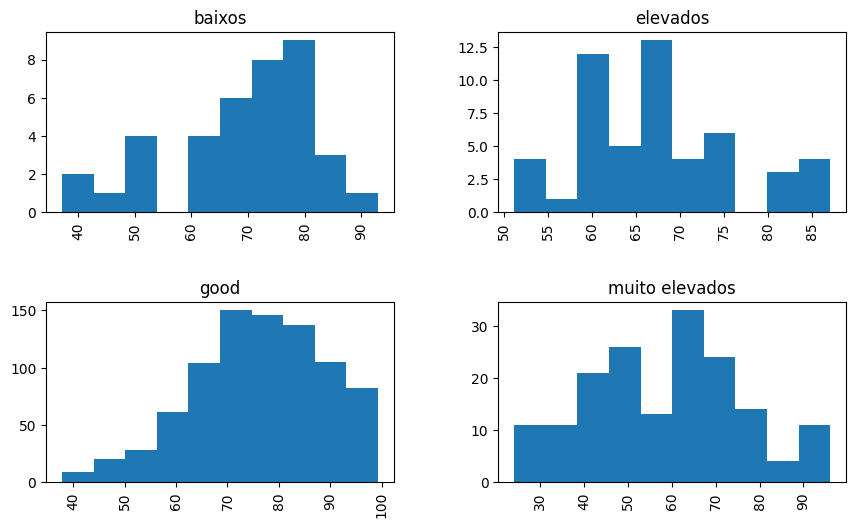

In [11]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

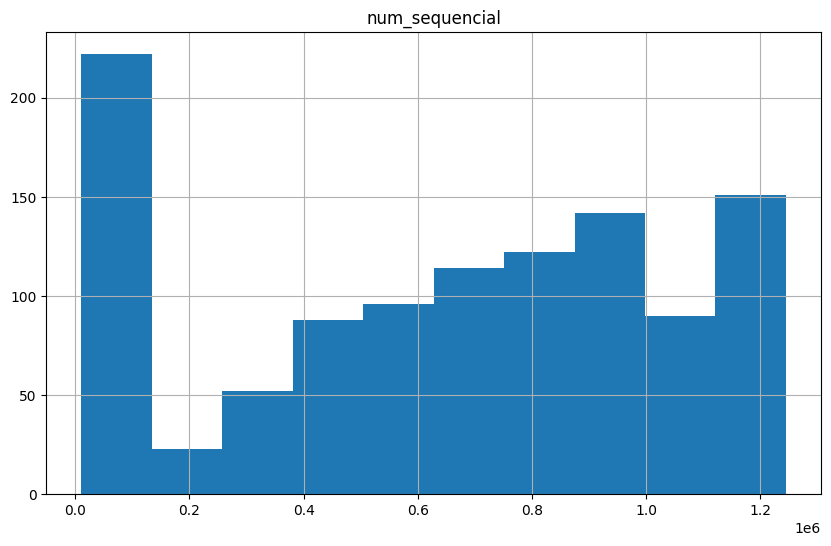

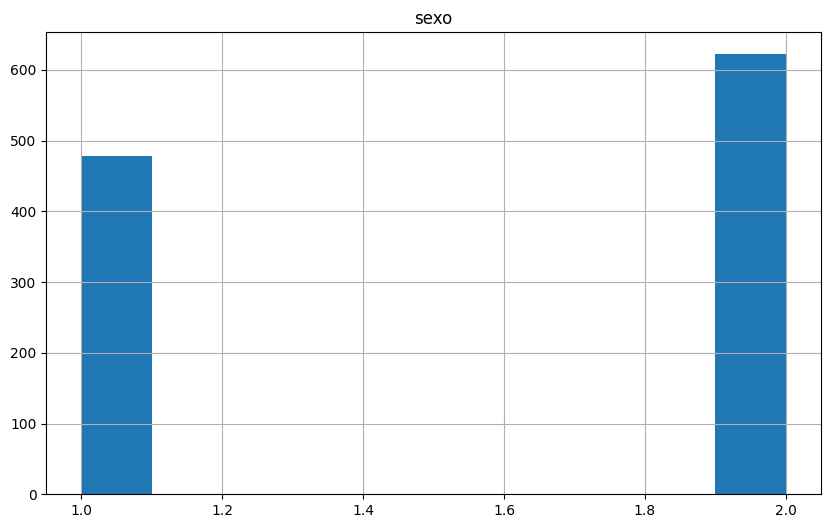

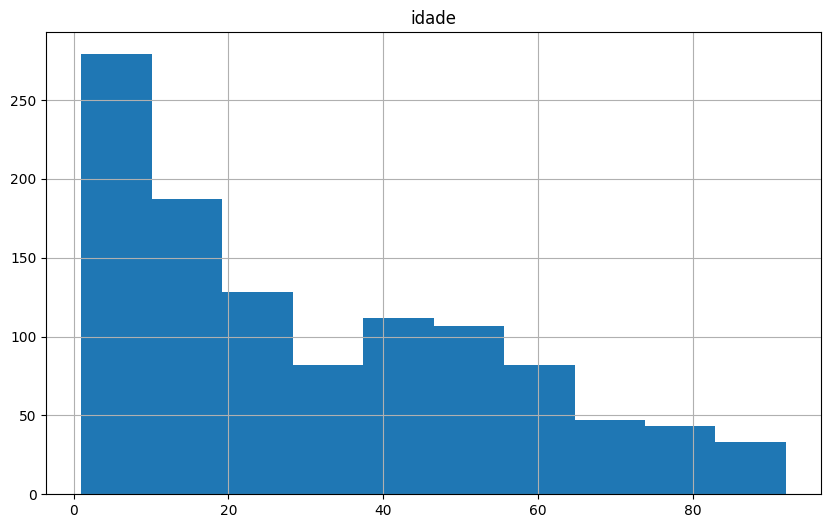

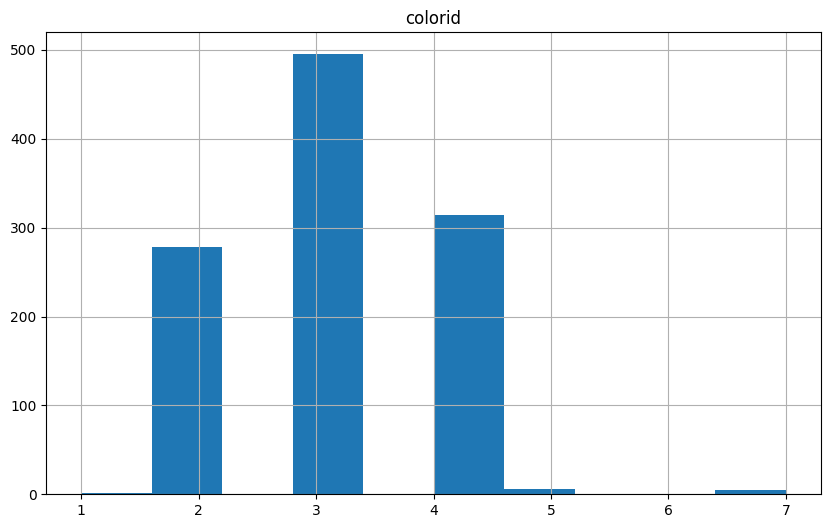

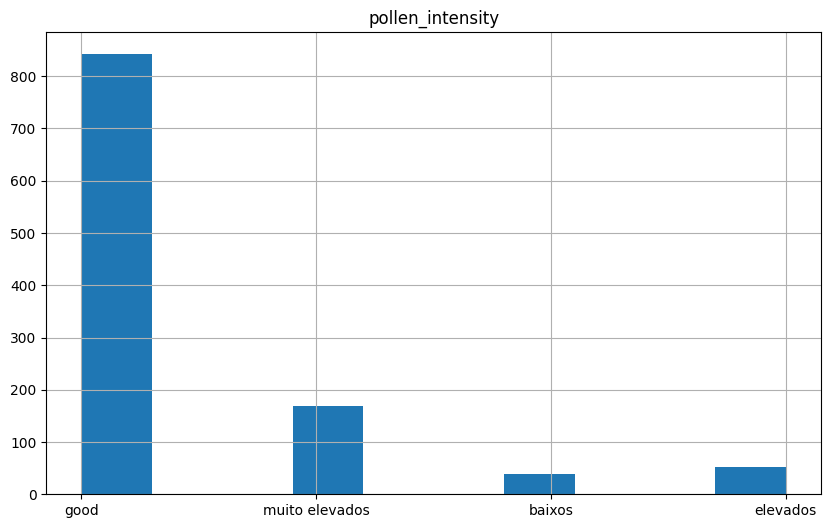

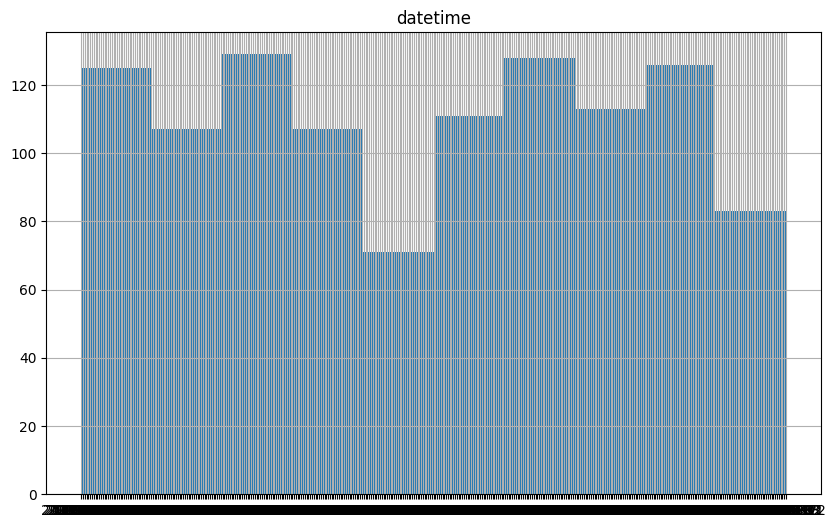

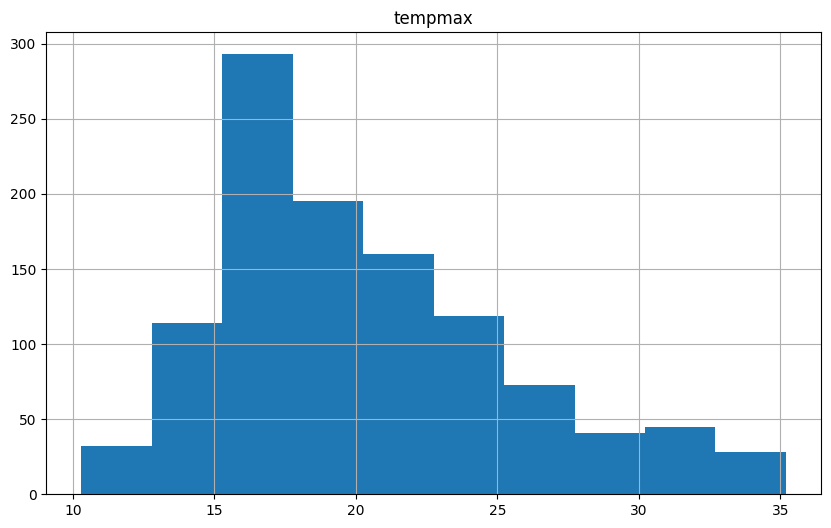

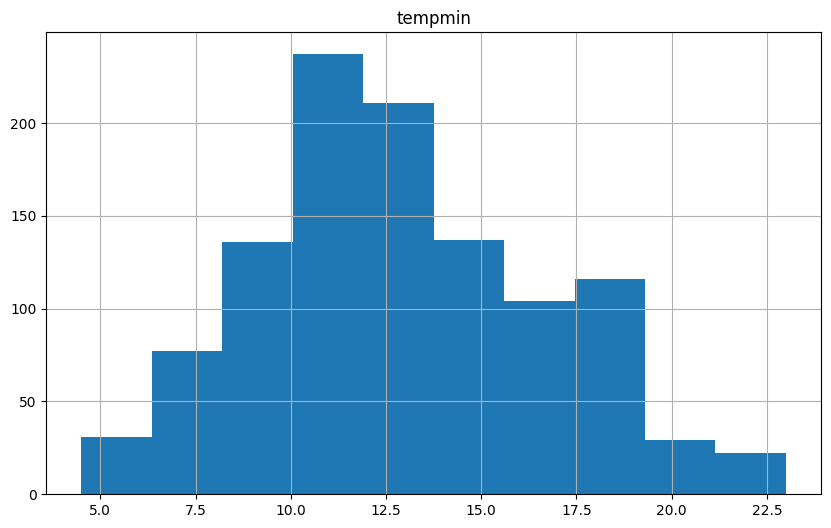

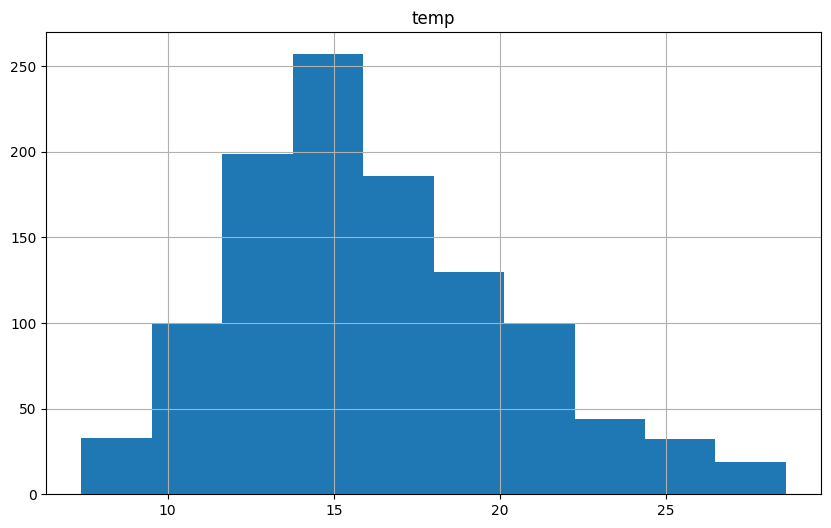

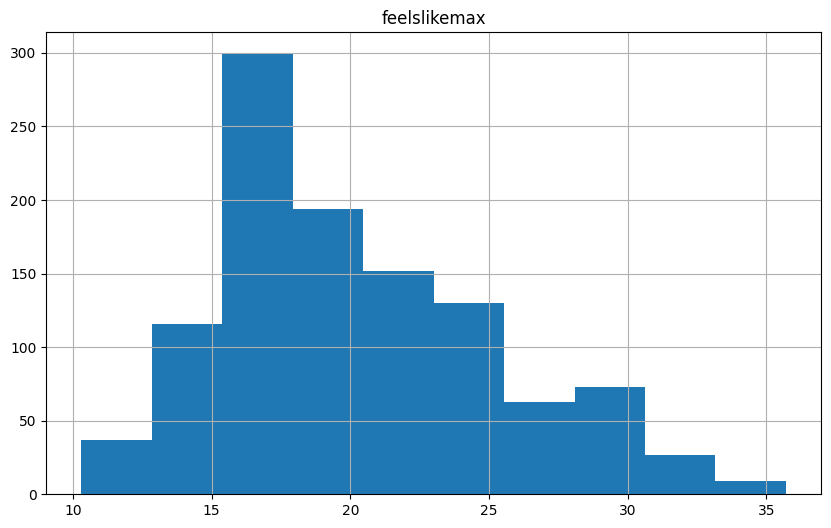

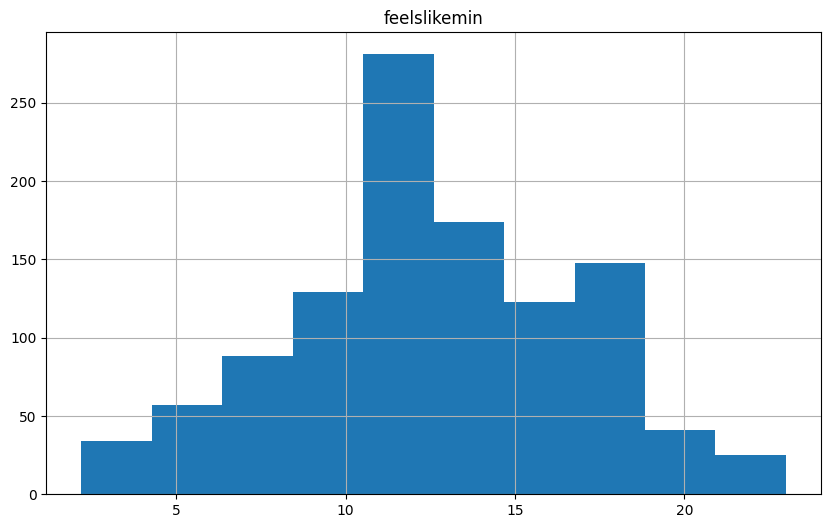

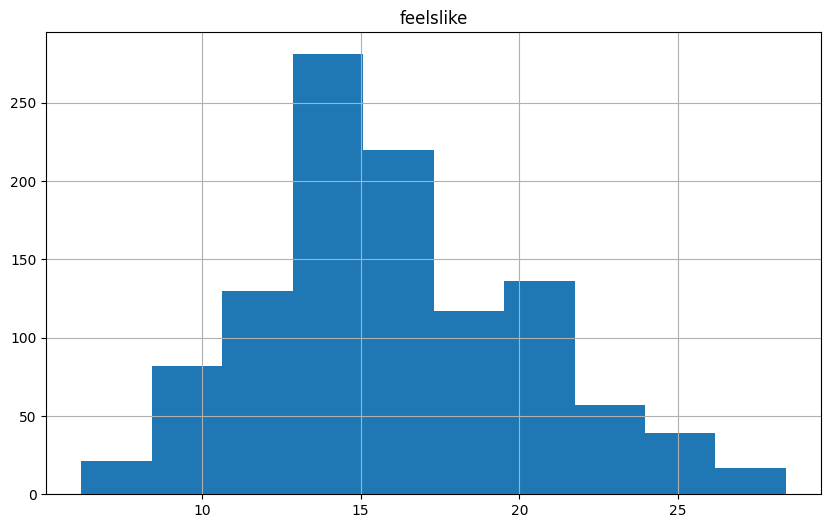

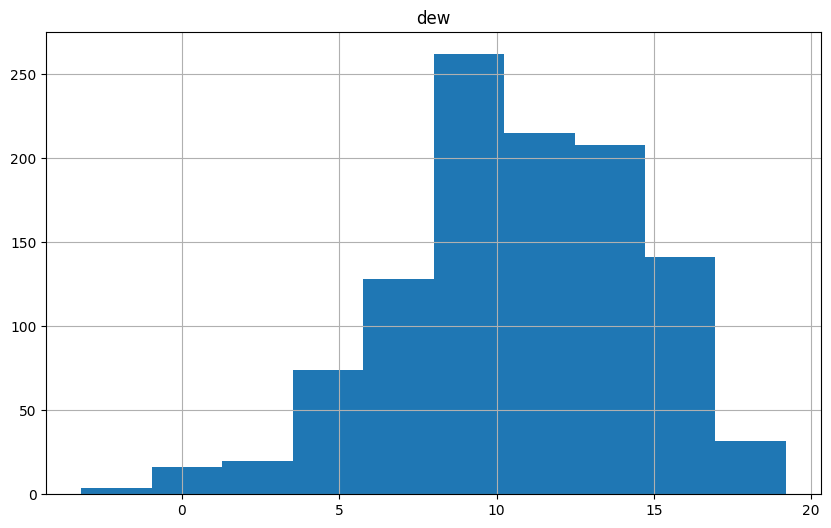

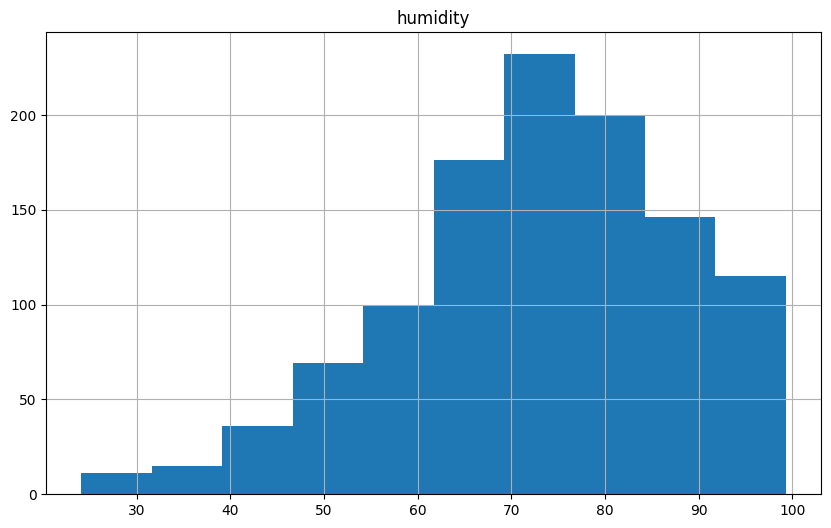

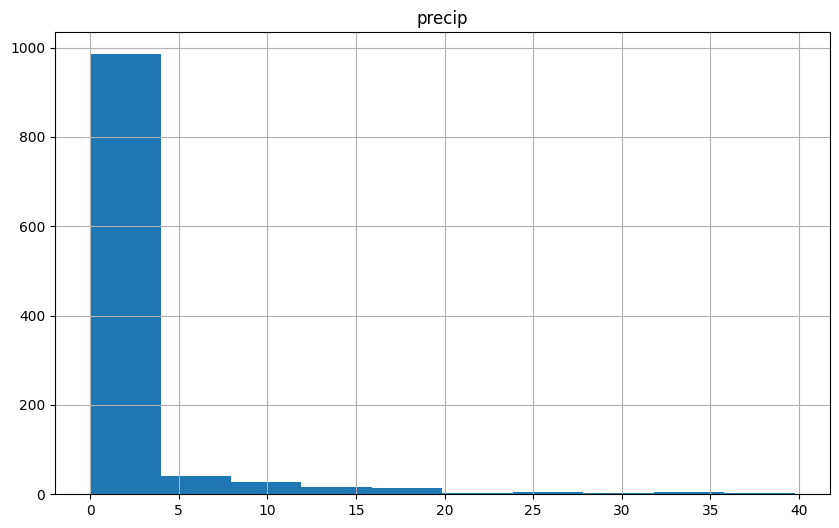

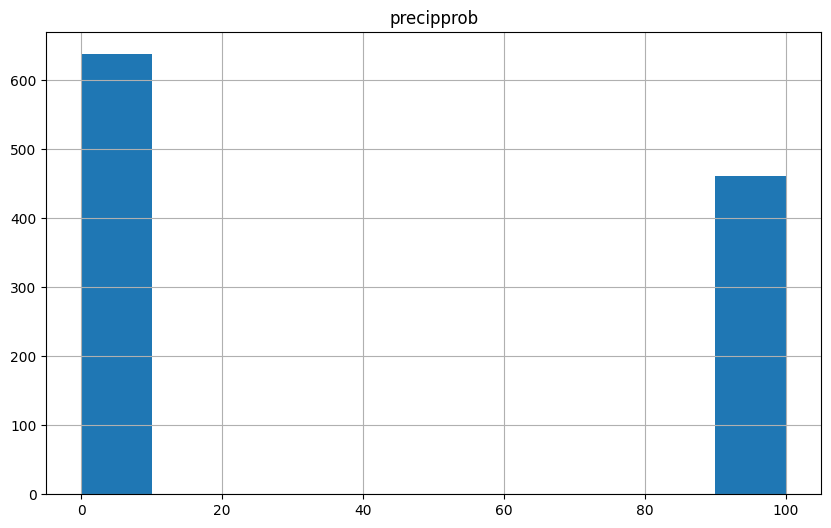

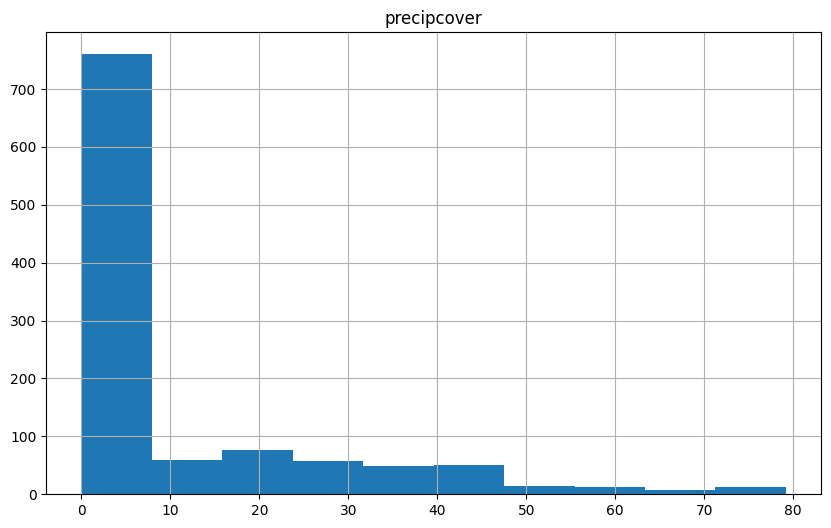

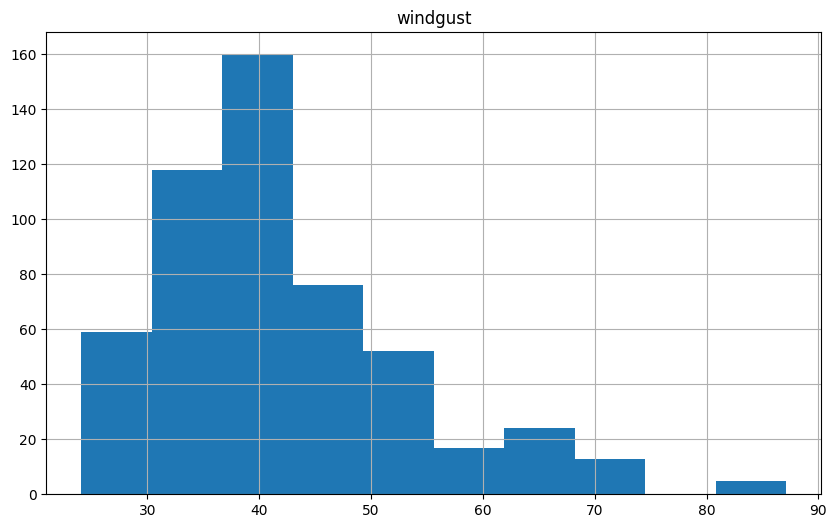

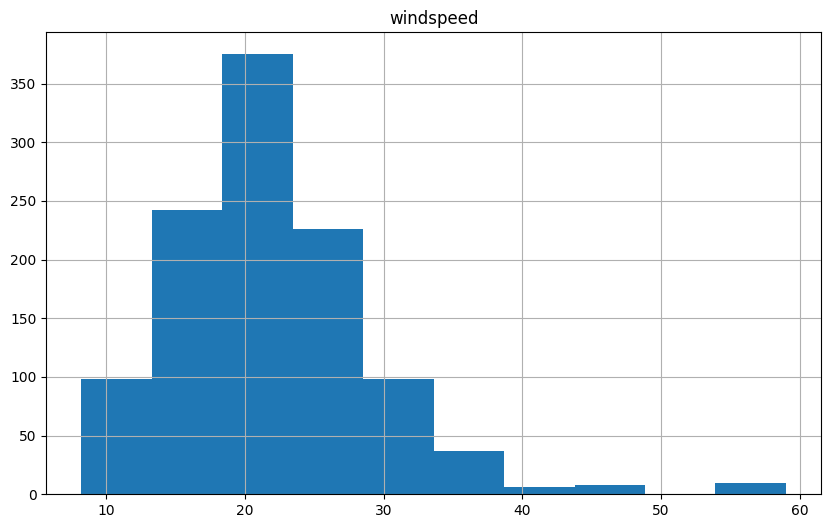

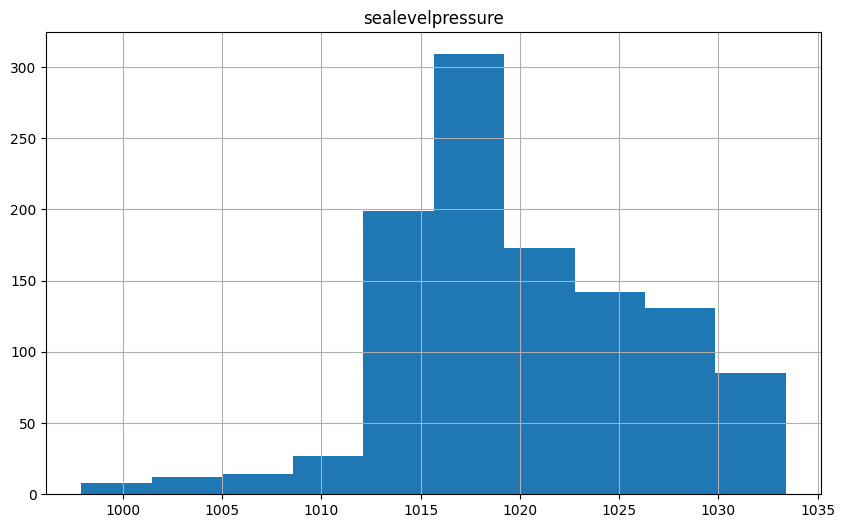

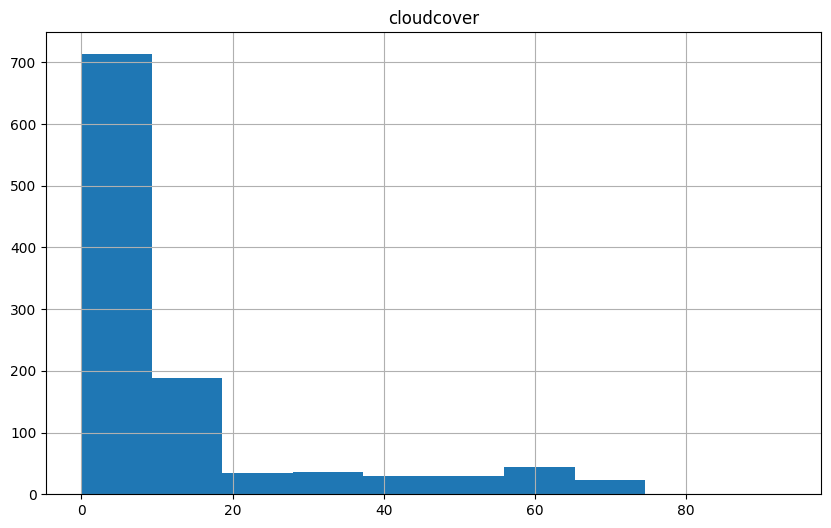

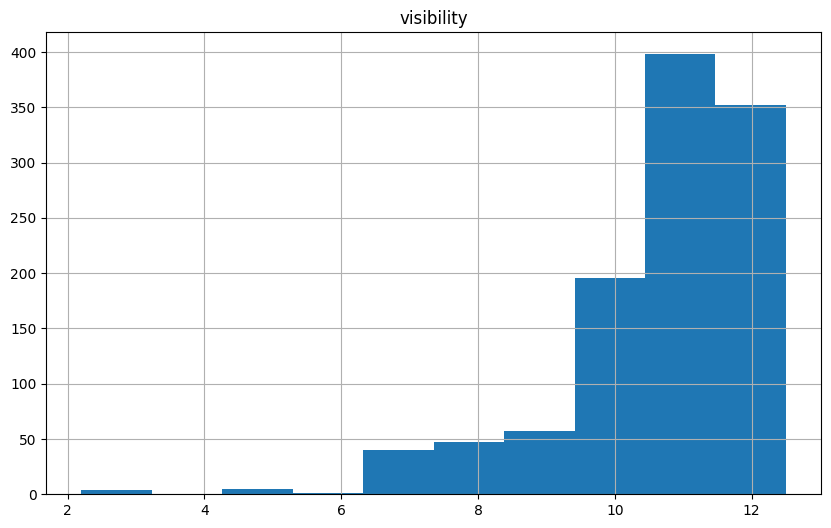

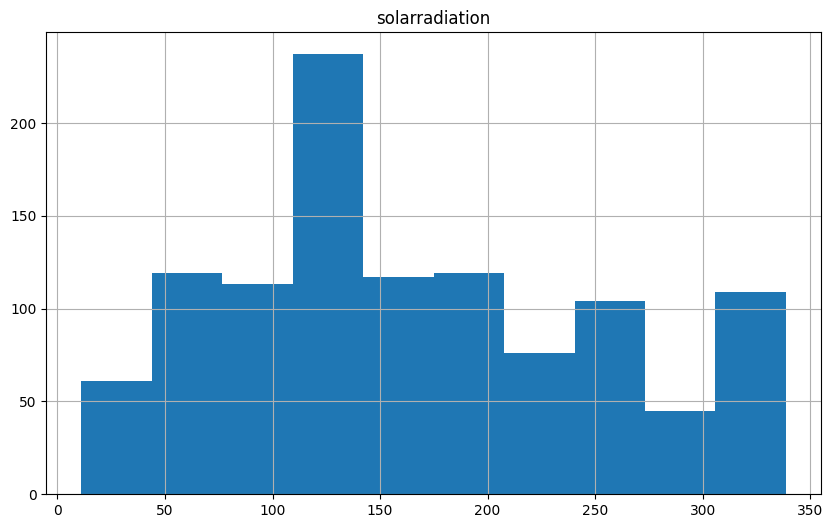

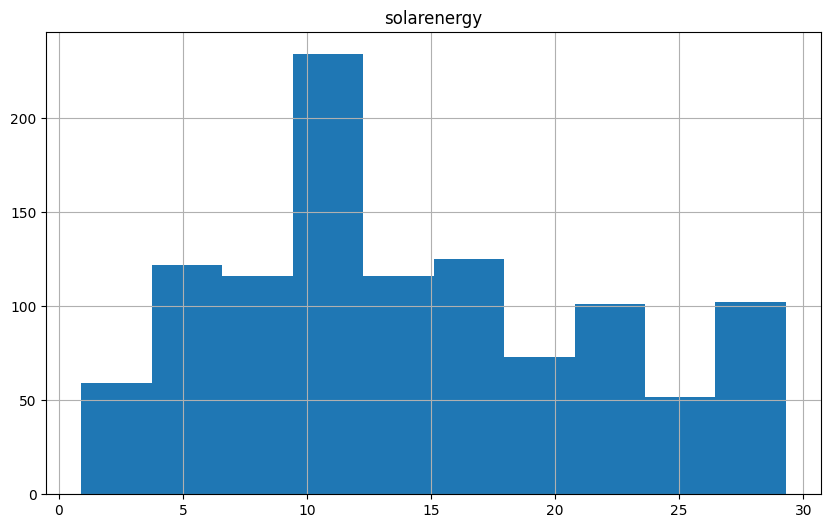

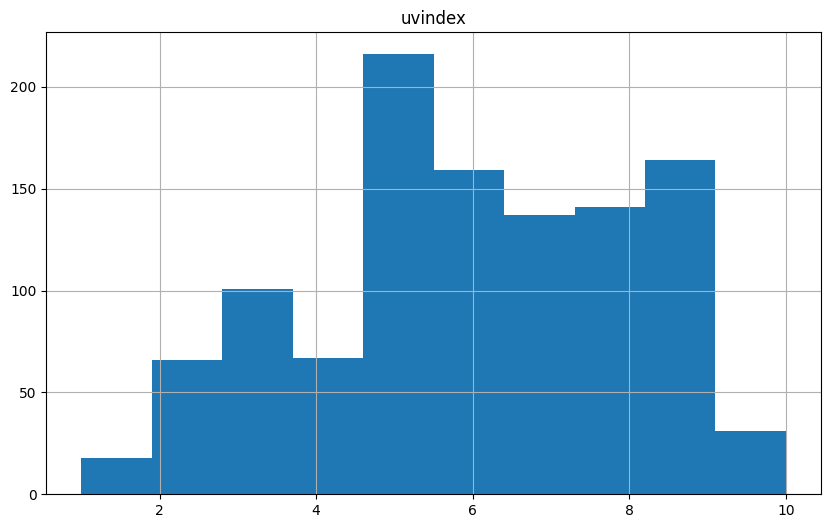

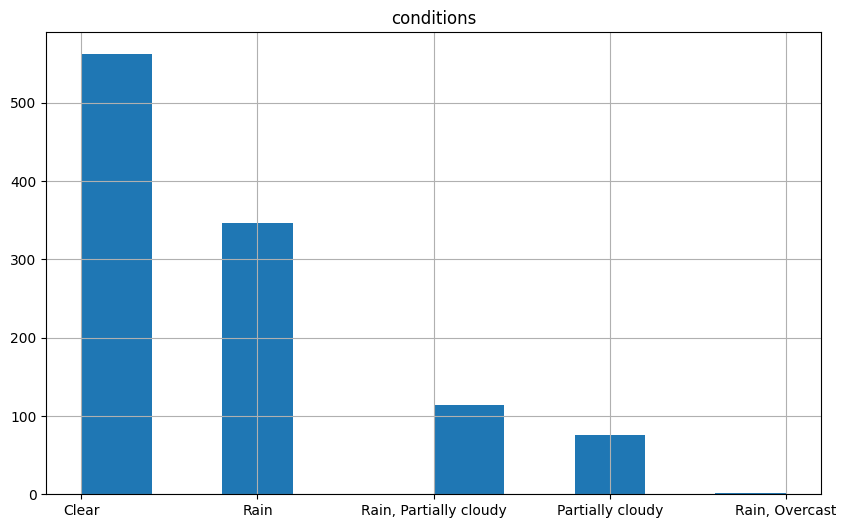

In [12]:
for col in df:
    df[col].hist(figsize=(10,6))
    plt.title(col)
    plt.show()


In [24]:
weather = pd.read_excel('Lisbon,Portugal 2019-01-01 to 2020-03-31.xlsx')

array([[<AxesSubplot: title={'center': 'tempmax'}>,
        <AxesSubplot: title={'center': 'tempmin'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'feelslikemax'}>,
        <AxesSubplot: title={'center': 'feelslikemin'}>],
       [<AxesSubplot: title={'center': 'feelslike'}>,
        <AxesSubplot: title={'center': 'dew'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'precip'}>,
        <AxesSubplot: title={'center': 'precipprob'}>],
       [<AxesSubplot: title={'center': 'precipcover'}>,
        <AxesSubplot: title={'center': 'snow'}>,
        <AxesSubplot: title={'center': 'snowdepth'}>,
        <AxesSubplot: title={'center': 'windgust'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'winddir'}>,
        <AxesSubplot: title={'center': 'sealevelpressure'}>,
        <AxesSubplot: title={'center': 'cloudcover'}>,
        <AxesSubplot: title={'cente

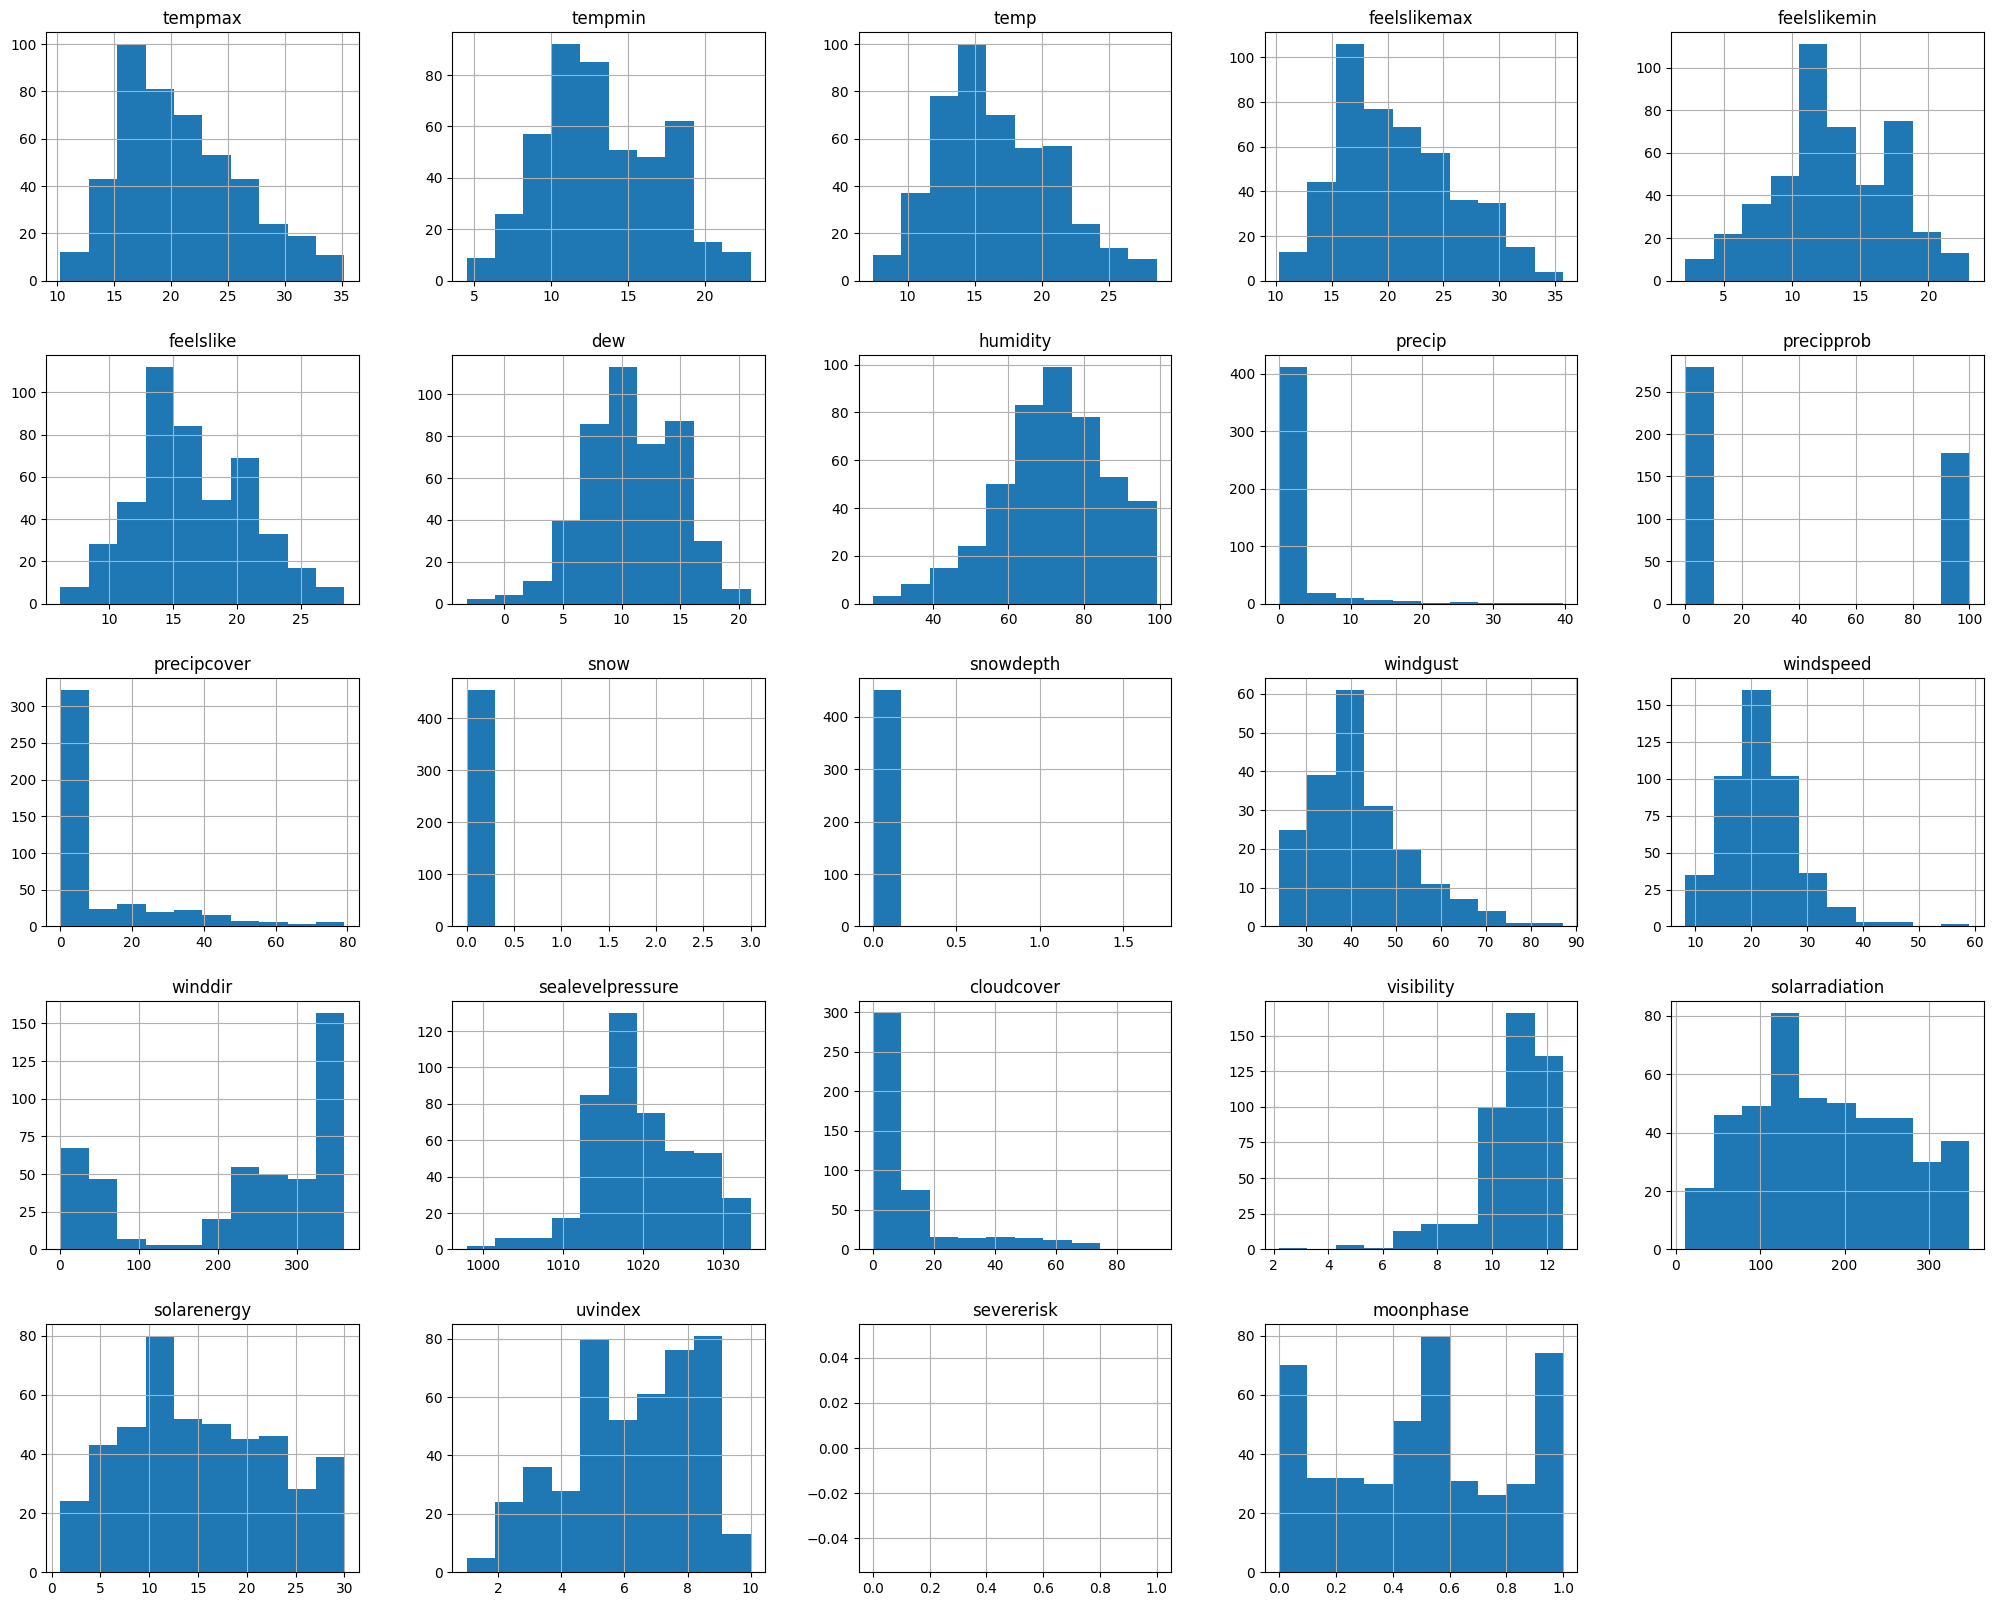

In [28]:
weather.hist(figsize=(25,20))

In [13]:
# tempAmplitude